In [1]:
# Any copyright is dedicated to the Public Domain.
# https://creativecommons.org/publicdomain/zero/1.0/

# Joseph Catanzarite
#     Adapted from code originally written by Francois Fleuret <francois@fleuret.org>

# Downloads data from
# https://github.com/CSSEGISandData/COVID-19/
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os, time
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import urllib.request

import requests
import pandas as pd
import io
import datetime
from parse import *
import re
from dateutil.rrule import rrule, DAILY

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Get the JHU timeseries data for confirmed cases and deaths

In [21]:
url1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

# url_dict = {url1:'Confirmed',url2:'Deaths',url3:'Recovered'}
url_dict = {url1:'Confirmed',url2:'Deaths'}


In [4]:
cf = requests.get(url1).content
df_con = pd.read_csv(io.StringIO(cf.decode('utf-8')))
df_con.name = 'Confirmed'

dd = requests.get(url2).content
df_die = pd.read_csv(io.StringIO(dd.decode('utf-8')))
df_die.name = 'Deaths'

#rc = requests.get(url3).content
#df_rec = pd.read_csv(io.StringIO(rc.decode('utf-8')))
#df_rec.name = 'Recovered'

## Table of fractional increase in today's confirmed cases ves. yesterday's

### Helper function to extract time serise of dates

In [5]:
def get_dates(df):
    date_cols = df.columns.to_list()
    non_dates = ['Province/State', 'Country/Region', 'Lat', 'Long']
    for item in non_dates:
        date_cols.remove(item)
    return date_cols


### Table sorted by # of confirmed cases

In [6]:
# fractional increase of today's over yesterday's confirmed counts, sorted
date_cols = get_dates(df_con)
dg_con = df_con.groupby(['Country/Region'])[date_cols].sum(axis=0).sort_values(by=date_cols[-1],ascending=False)
dg_con['%increase'] = 100*(dg_con[date_cols[-1]]-dg_con[date_cols[-2]])/dg_con[date_cols[-2]]
dg_con[[date_cols[-2],date_cols[-1],'%increase']].replace([np.inf, -np.inf], np.nan).dropna().sort_values(date_cols[-1],ascending = False)

,3/24/20,3/25/20,%increase
Country/Region,,,
China,81591,81661,0.085794
Italy,69176,74386,7.531514
US,53740,65778,22.400447
Spain,39885,49515,24.144415
Germany,32986,37323,13.148002
Iran,24811,27017,8.891218
France,22622,25600,13.164176
Switzerland,9877,10897,10.327022
United Kingdom,8164,9640,18.079373


### Table sorted by %increase in confirmed cases over previous day

In [7]:
dg_con[[date_cols[-2],date_cols[-1],'%increase']].replace([np.inf, -np.inf], np.nan).dropna().sort_values('%increase',ascending = False)

,3/24/20,3/25/20,%increase
Country/Region,,,
Syria,1,5,400.000000
Eritrea,1,4,300.000000
Zambia,3,12,300.000000
Djibouti,3,11,266.666667
Dominica,2,7,250.000000
Niger,3,7,133.333333
Belize,1,2,100.000000
Israel,1238,2369,91.357027
El Salvador,5,9,80.000000


### Fractional increase of today's over yesterday's deaths, sorted
Note that deaths have dates in mm/dd/yy format, while confirmed has dates in mm/dd/yyyy format

In [8]:
date_cols = get_dates(df_die)
dg_die = df_die.groupby(['Country/Region'])[date_cols].sum(axis=0).sort_values(by=date_cols[-1],ascending=False)
dg_die['%increase'] = 100*(dg_die[date_cols[-1]]-dg_die[date_cols[-2]])/dg_die[date_cols[-2]]
dg_die[[date_cols[-2],date_cols[-1],'%increase']].replace([np.inf, -np.inf], np.nan).dropna().sort_values(date_cols[-1],ascending = False)

,3/24/20,3/25/20,%increase
Country/Region,,,
Italy,6820,7503,10.014663
Spain,2808,3647,29.878917
China,3281,3285,0.121914
Iran,1934,2077,7.394002
France,1102,1333,20.961887
US,706,942,33.427762
United Kingdom,423,466,10.165485
Netherlands,277,357,28.880866
Germany,157,206,31.210191


## Time series plot helper function

In [9]:
def plot_timeseries(df):
    
    
    cum_switch = True
    date_cols = df.columns.to_list()
    non_dates = ['Province/State', 'Country/Region', 'Lat', 'Long']
    for item in non_dates:
        date_cols.remove(item)

    dg = df.groupby(['Country/Region'])[date_cols].sum(axis=0).sort_values(by=date_cols[-1],ascending=False)
            
    # account for different date format 
    try:
        dates = [datetime.datetime.strptime(col,'%m/%d/%Y') for col in dg.columns]
    except:
        dates = [datetime.datetime.strptime(col,'%m/%d/%y') for col in dg.columns]
        
    myFmt = mdates.DateFormatter('%b %d')

    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(1, 1, 1)
    ax.xaxis_date()
    ax.yaxis.grid(color='gray', linestyle='-', linewidth=0.25)
    ax.set_title('Cumulative number of COVID-19 cases: ' + df.name)
    ax.set_xlabel('Date', labelpad = 10)
    ax.set_ylabel('Counts', labelpad = 10)
    ax.set_yscale('log')
    ax.xaxis.set_major_formatter(myFmt)
    
    # matplotlib list of named colors
    # https://matplotlib.org/3.1.0/gallery/color/named_colors.html
    
    for key, color, label in [
            ('Germany', 'blue', 'Germany'),
            ('Spain', 'red', 'Spain'),
            ('France', 'lightgreen', 'France'),
            ('US', 'black', 'USA'),
            ('Korea, South', 'gray', 'South Korea'),
            ('Italy', 'purple', 'Italy'),
            ('China', 'orange', 'China'),
            ('Iran', 'cyan', 'Iran'),
            ('Switzerland', 'magenta', 'Switzerland'),
            ('Norway', 'salmon', 'Norway'),
            ('United Kingdom', 'cornflowerblue', 'United Kingdom'),
            ('Netherlands', 'maroon', 'Netherlands'),
            ('Sweden', 'turquoise', 'Sweden'),
        

    ]:
        if(cum_switch):
            ax.plot(dates, dg.loc()[key], color = color, label = label, linewidth=2)
        elseif:
            # daily cases -- TBD
            ax.plot(dates, dg.loc()[key][1:] - dg.loc()[key][:-2], color = color, label = label, linewidth=2)
            xx = zip( (dg.loc()[key][1:], dg.loc()[key][:-2]) )
            
    ax.legend(frameon = True)
    plt.xticks(rotation = 75)
    plt.grid()
    plt.show()
    

    last_date = date_cols[-1].replace('/', '-',2) 
    png_name = 'COVID-19-'+df.name+'-'+last_date+'.png'

    #fig.savefig('covid19_confirmed.png')
    fig.savefig(png_name)


## Plot  `Confirmed`, `Deaths`, and `Recoveries`  timeseries

Confirmed


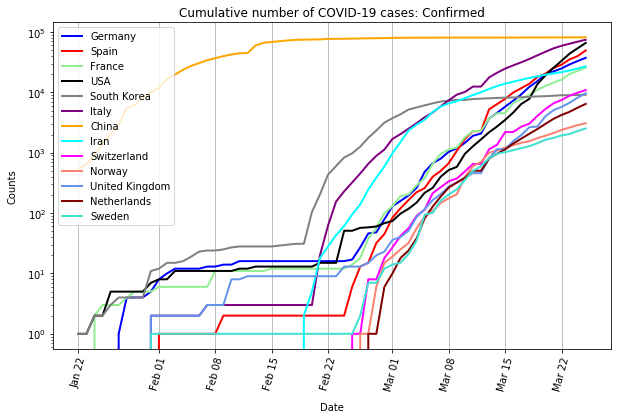

Deaths


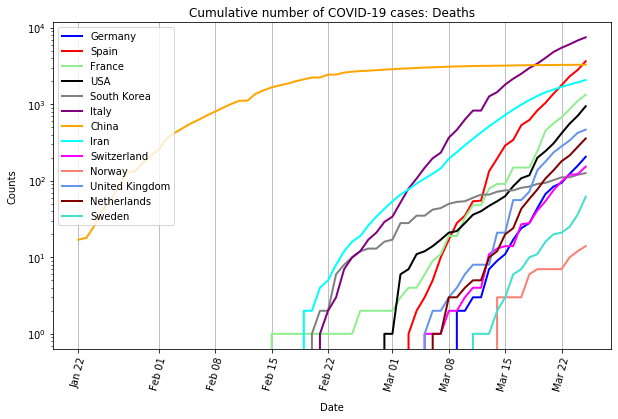

In [10]:
# for df in [df_con, df_die, df_rec]:
for df in [df_con, df_die]:
    print(df.name)
    plot_timeseries(df)

### Corner case, 3/25/2020

In [12]:
# df_con has a new row for West Bank and Gaza confirmed cases, 
#     while df_die does not, because there are not yet any deaths reported for West Bank and Gaza
min_deaths = 15
print(df_die.shape, df_con.shape)
df_con = df_con[df_con[df_con.columns[1]] != 'The West Bank and Gaza']

num = df_die[df_die[df_die.columns[-1]] > min_deaths][df_die.columns[-1]]
den = df_con[df_die[df_die.columns[-1]] > min_deaths][df_con.columns[-1]]
print(len(num))

(245, 68) (245, 68)
30


### Mortality Rate of Confirmed cases

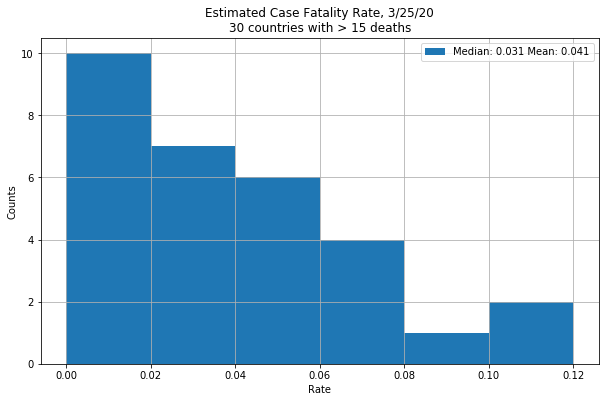

In [13]:
rates = num/den
# bins = [0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085, 0.095, 0.105]
bins = [0,  0.02,  0.04,  0.06,  0.08,  0.10, 0.12]
fig = plt.figure(figsize=(10,6))
plt.hist(rates,bins = bins)
plt.ylabel("Counts")
plt.xlabel("Rate")
plt.title("Estimated Case Fatality Rate, " + str(df_die.columns[-1]) + "\n" + str(len(rates)) +  " countries with > 15 deaths")
plt.legend(["Median: "+str(round(1000*np.median(rates))/1000)+" Mean: "+str(round(1000*np.mean(rates))/1000)])
plt.grid()
pnt_name = 'estimated_CFR.png'
fig.savefig(pnt_name)

### Estimates of Case Fatality Rate (CFR)

In [20]:
# Median CFR
print(np.median(rates))
# Mean CFR
print(np.mean(rates))
# Weighted average CFR, weighting by #of deaths
print(sum(rates[num>15]*num[num>15])/sum(num[num>15]))

0.03061329093693007
0.04053272875303538
0.07187339368462524
